Mounted at /content/drive
[[-0.26000166 -0.17362339 -0.11955988  0.19735981]]
Accuracy: 0.5714285714285714
Precision (Male): 0.75
Recall (Male): 0.6
Precision (Female): 0.3333333333333333
Recall (Female): 0.5


['/content/drive/MyDrive/Colab Notebooks/logistic_regression_model.joblib']

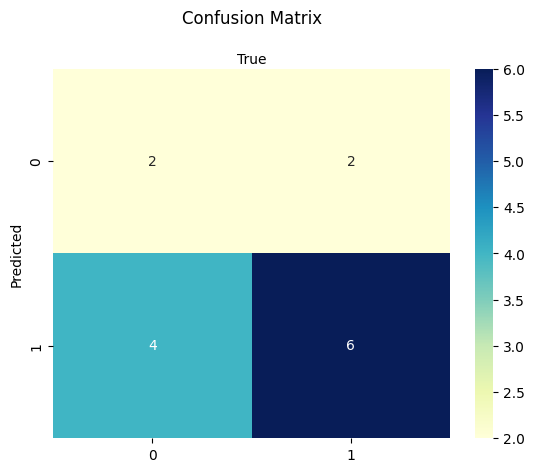

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Path dataset di Google Drive
dataset_path = '/content/drive/MyDrive/Colab Notebooks/TransformedDataSet.csv'

# Membaca dataset
df = pd.read_csv(dataset_path)

# Deskripsi dataset
df.describe()

# Cek nilai null
df.isnull().sum()

# Memisahkan fitur dan target
X = df.drop(['Gender'], axis=1)
Y = df['Gender']

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Menggunakan LabelEncoder untuk mengubah kolom string menjadi numerik
label_encoders = {}
for column in X_train.columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = le.transform(X_test[column])
    label_encoders[column] = le

# Membuat dan melatih model Regresi Logistik
model = LogisticRegression()
model.fit(X_train, Y_train)
print(model.coef_)

# Melakukan prediksi
Y_pred = pd.Series(model.predict(X_test))
Y_test = Y_test.reset_index(drop=True)
z = pd.concat([Y_test, Y_pred], axis=1)
z.columns = ['True', 'Prediction']
z.head()

# Evaluasi model
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision (Male):", metrics.precision_score(Y_test, Y_pred, pos_label="M"))
print("Recall (Male):", metrics.recall_score(Y_test, Y_pred, pos_label="M"))
print("Precision (Female):", metrics.precision_score(Y_test, Y_pred, pos_label="F"))
print("Recall (Female):", metrics.recall_score(Y_test, Y_pred, pos_label="F"))

# Confusion matrix
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Predicted')
plt.xlabel('True')

from joblib import dump
model_path = '/content/drive/MyDrive/Colab Notebooks/logistic_regression_model.joblib'
dump(model, model_path)